In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Chapter 2 Empirical Analysis

This notebook is the Optional: Empirical Analysis of Network Data from Matthew O. Jackson's Social and Economic Network course on coursera.
The data is provided in that course.

In [3]:
graph = nx.read_pajek('../data/_334c892bc1b2a20b7d53e77133fc45a9_imports_manufactures.net')

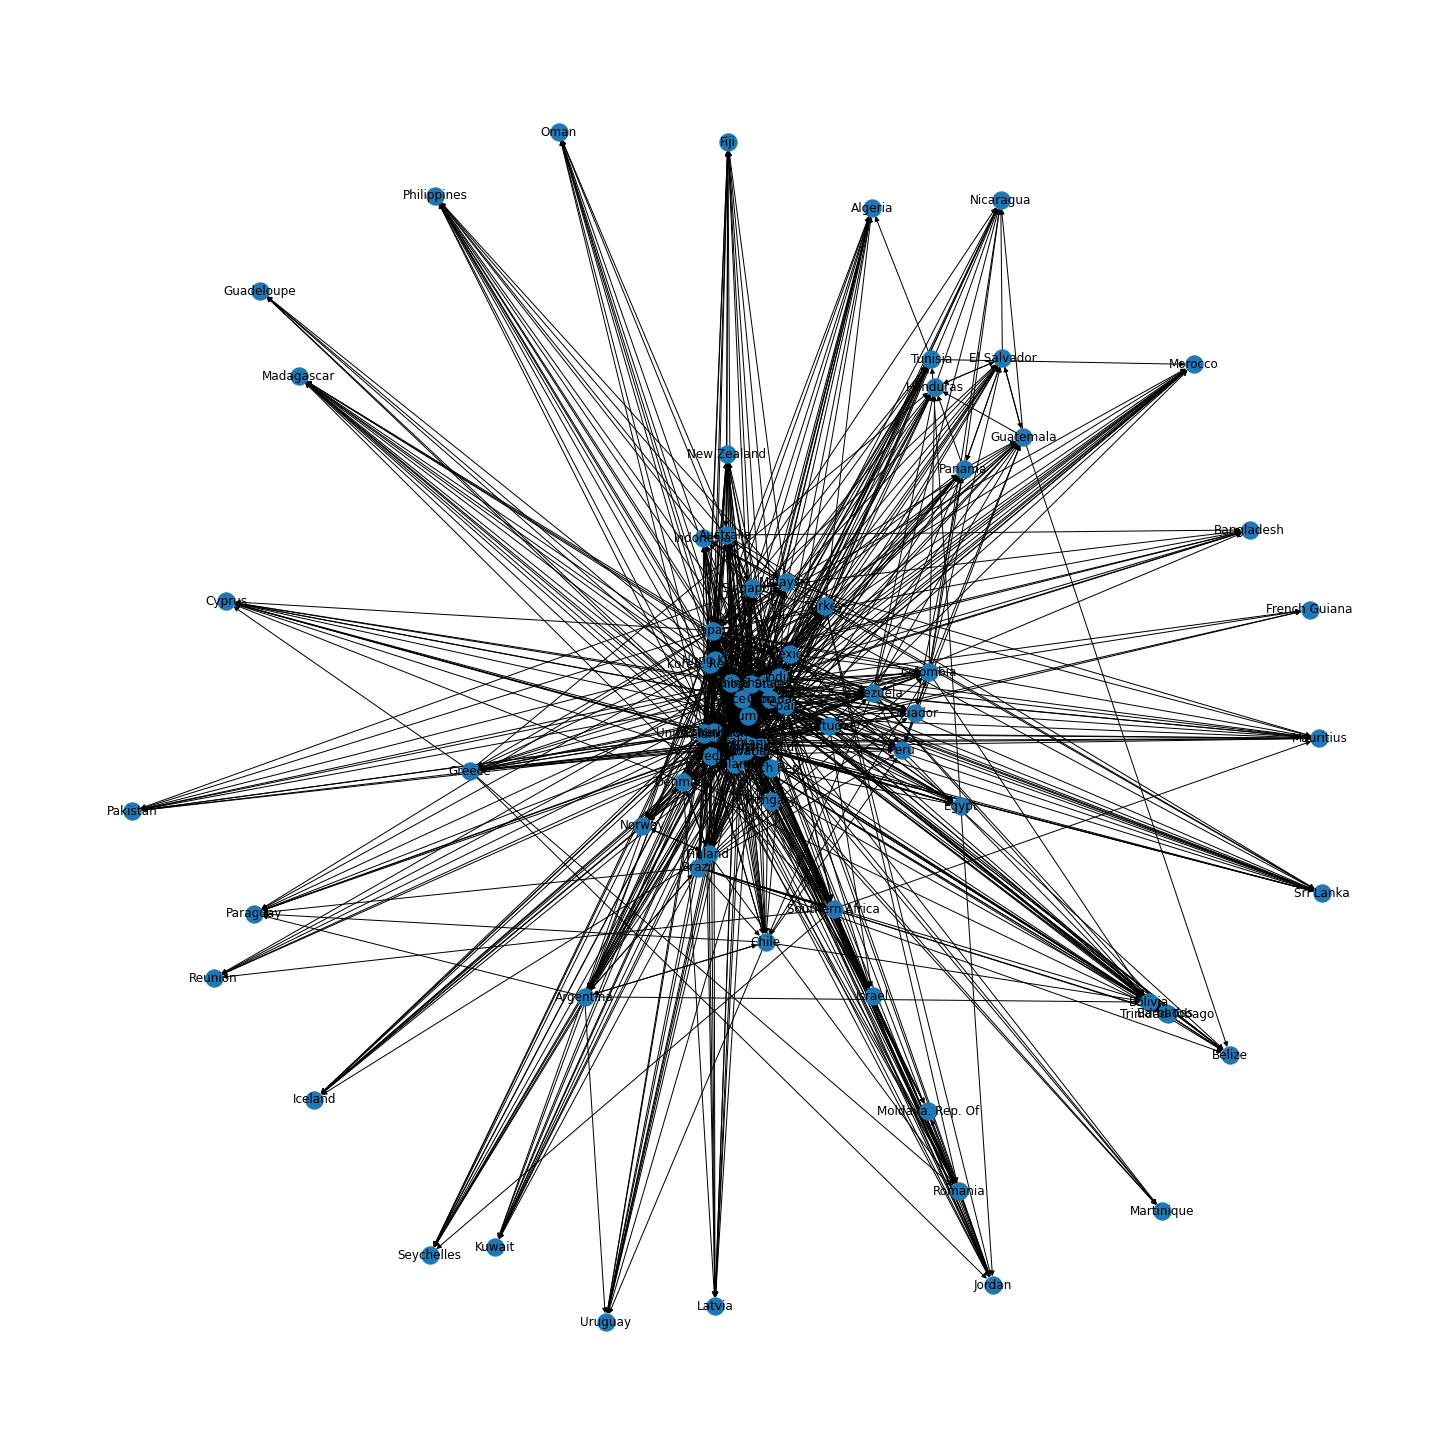

In [7]:
plt.figure(figsize=(20,20))
pos = nx.spring_layout(graph, k=0.15, iterations=20)
nx.draw(graph, with_labels=True)

### Which of the following country has the maximum closeness centrality?

The subset of the closeness centrality set from networkx returns the United States as the highest rated node.

In [94]:
closeness_centrality = nx.closeness_centrality(graph)
highest_scoring_node = sorted(closeness_centrality, key=closeness_centrality.get, reverse=True)[0]
print('The highest scoring node of all is {} with a score of {}'.format(highest_scoring_node, closeness_centrality[highest_scoring_node]))

countries = ['Germany', 'United States', 'Canada', 'China', 'Japan']
closeness_centrality_subset = {k: closeness_centrality[k] for k in countries}
highest_scoring_subset_node = sorted(closeness_centrality_subset, key=closeness_centrality.get, reverse=True)[0]
print('The highest scoring node of our subset is {} with a score of {}'.format(highest_scoring_subset_node, closeness_centrality[highest_scoring_subset_node]))

The highest scoring node of all is El Salvador with a score of 0.3043728423475259
The highest scoring node of our subset is United States with a score of 0.20446419943955937


However, that's not true. We'll define a revised version of the function and check it.

In [11]:
def closeness_centrality_revision(graph, sort='desc'):
    """
    This function takes a graph and returns the list of closeness centrality values for each node.
    """
    close_central = []
    n = graph.number_of_nodes()
    path_lengths = []
    path_length_sums = []
    for i in np.arange(n):
        for j in np.arange(n):
            if nx.has_path(graph, list(graph.nodes)[i], list(graph.nodes)[j]) == False and i != j:
                path_lengths.append(0)
            elif i != j:
                path_lengths.append(nx.shortest_path_length(graph, source=list(graph.nodes)[i], target=list(graph.nodes)[j]))
        path_length_sums.append(np.sum(path_lengths))
        path_lengths = []
    
    close_central = [0 if path_length_sums[i] == 0 else (n-1)/path_length_sums[i] for i in np.arange(n)]
    close_central_list = [(list(graph.nodes)[i], close_central[i]) for i in np.arange(n)]

    if sort != 'desc':
        return close_central_list

    return sorted(close_central_list, key=lambda x: x[1], reverse=True)

In [99]:
close_central_measures = closeness_centrality_revision(graph)
close_central_measures_subset = [close_central_measures[i] for i in np.arange(len(close_central_measures)) if close_central_measures[i][0] in countries]
close_central_measures_subset

[('Germany', 0.9753086419753086),
 ('United States', 0.9186046511627907),
 ('China', 0.7821782178217822),
 ('Japan', 0.7821782178217822),
 ('Canada', 0.5302013422818792)]

So the actual answer here is Germany, not the United States. This might have to do with the graph being directed. Our calculation doesn't take direction into consideration.
Let's convert the graph to undirected and take another gander at NetworkX's results.

In [107]:
graph_und = graph.to_undirected()

und_close_centr = nx.closeness_centrality(graph_und)
und_close_centr_subset = {k: und_close_centr[k] for k in countries}

In [110]:
und_close_centr_subset

{'Germany': 0.9753086419753086,
 'United States': 0.9186046511627907,
 'Canada': 0.5808823529411765,
 'China': 0.7821782178217822,
 'Japan': 0.79}

This definiitely looks better. However, it looks like the values for Canada and Japan are different than our calculation. For Canada, it's a whole 10% off. Whereas for Japan, it's nearer to 1% off.

### Which of the following country has the maximum "Betweenness centrality"?

In [18]:
betweenness_centrality = nx.betweenness_centrality(graph)
betweenness_centrality_subset = {k: betweenness_centrality[k] for k in countries}
sorted(betweenness_centrality_subset, key=betweenness_centrality.get, reverse=True)[0]

'United States'

### Please indicate with which of the following average degrees the networks you generated turned out to be connected

In [25]:
n = 400
degrees = [1, 5, 10, 20]
probs = np.divide(degrees, n)
graphs = {}
for d, p in zip(degrees, probs):
    graphs[d] = nx.erdos_renyi_graph(n, p, seed=42, directed=False)


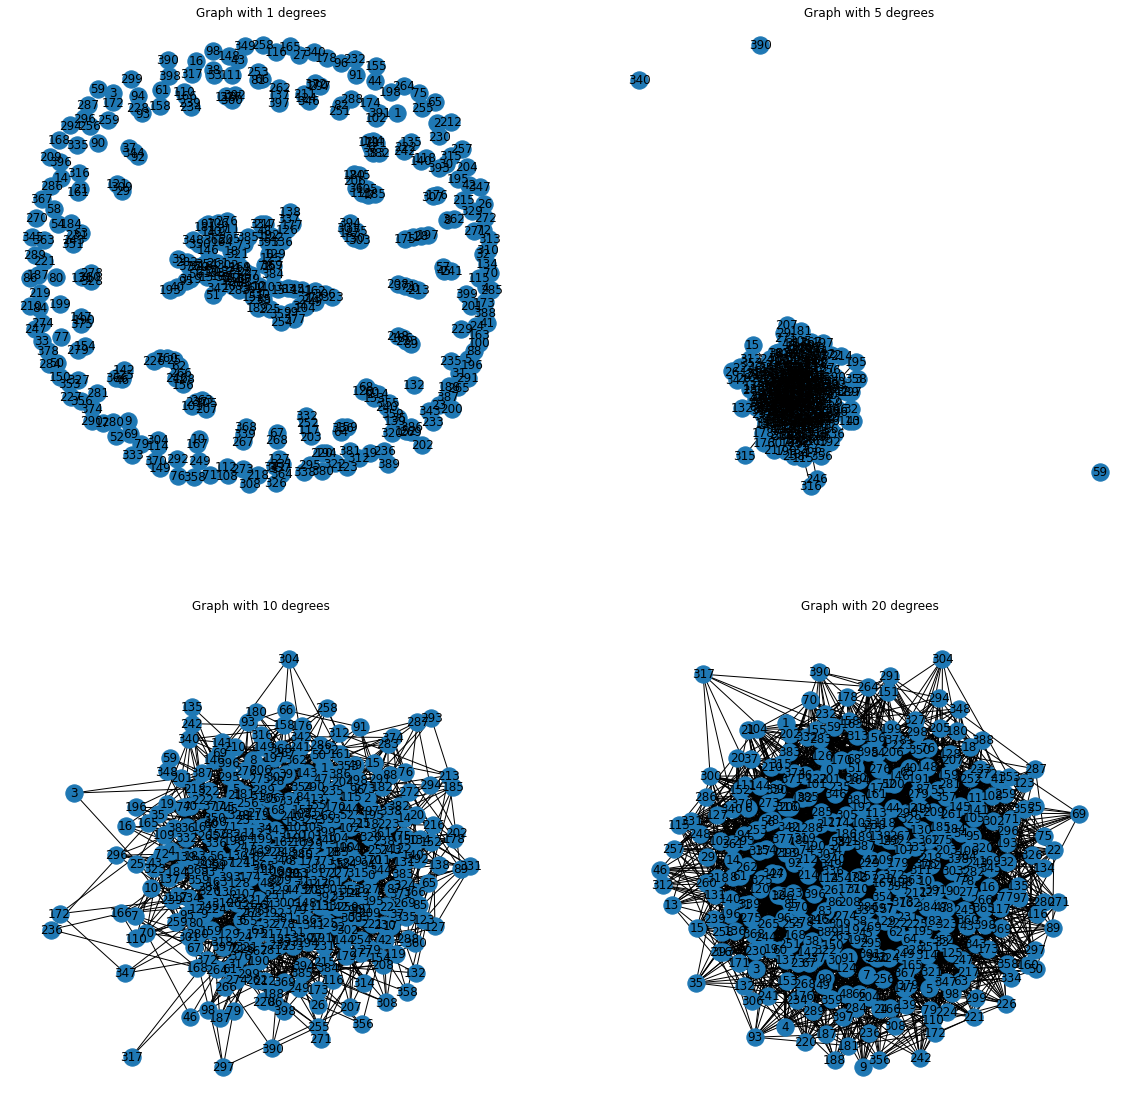

In [28]:
fig, axs = plt.subplots(2, 2, figsize=(20, 20))
for i, d in enumerate(degrees):
    ax = axs[i // 2, i % 2]
    nx.draw(graphs[d], with_labels=True, ax=ax)
    ax.set_title(f'Graph with {d} degrees')